# Diferença em diferença (DD)

O método de diferença em diferenças compara a diferença no resultado de interesse (como vendas, desempenho, saúde) entre dois grupos: um grupo de tratamento (que foi exposto à intervenção) e um grupo de controle (que não foi exposto). Essa comparação é feita antes e depois da intervenção, permitindo identificar o efeito da mudança ao longo do tempo.

**Comparar o Antes e Depois do Programa Permite Avaliar o Impacto Causal?**

- **Não!** Comparar apenas o antes e depois pode ser problemático porque muitos outros fatores podem influenciar o resultado ao longo do tempo. Por exemplo, no caso de uma análise de emprego, fatores econômicos externos, políticas governamentais, ou mudanças sazonais podem afetar o nível de emprego, dificultando a identificação do impacto isolado do programa.

**Comparar Quem Recebeu o Programa com Quem Não Recebeu Funciona?**

- **Não!** Comparar diretamente quem recebeu o programa com quem não recebeu também pode gerar vieses. Isso ocorre porque podem existir variáveis não observadas que determinam por que alguns indivíduos receberam o programa enquanto outros não. Esses fatores não observados podem influenciar os resultados, confundindo a análise e levando a uma estimativa incorreta do efeito do programa.

A abordagem de Diferenças em Diferenças combina dois cenários contrafactuais problemáticos (comparações antes e depois, e comparações entre os que escolheram se inscrever e os que não se inscreveram) para produzir uma estimativa mais precisa do cenário contrafactual.

- O cenário contrafactual estimado é a mudança nos resultados do grupo de comparação.
- Os grupos de tratamento e de comparação não precisam, necessariamente, ter as mesmas condições antes da intervenção.
- Para que o método seja válido, o grupo de comparação deve representar com precisão a mudança nos resultados que o grupo de tratamento teria experimentado na ausência do tratamento.

A melhor maneira de entender o conceito é visualizá-lo graficamente:

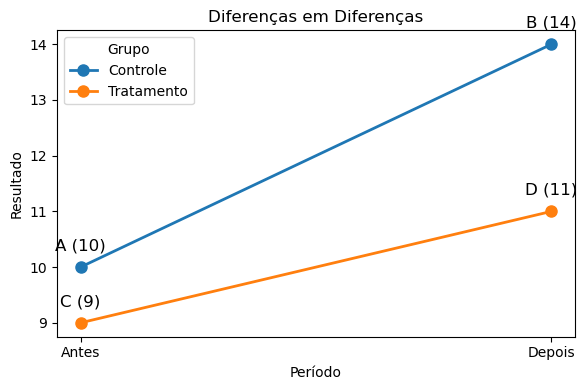

In [137]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Criando um DataFrame com os dados fornecidos
dados = pd.DataFrame({
    'periodo': ['Antes', 'Depois', 'Antes', 'Depois'],
    'grupo': ['Controle', 'Controle', 'Tratamento', 'Tratamento'],
    'resultado': [10, 14, 9, 11],
    'letras': ['A', 'B', 'C', 'D']  # Adicionar letras para identificar os pontos
})

# Criar gráfico de linha
plt.figure(figsize=(6, 4))
for grupo in dados['grupo'].unique():
    subset = dados[dados['grupo'] == grupo]
    plt.plot(subset['periodo'], subset['resultado'], marker='o', label=grupo, linewidth=2, markersize=8)

    # Adicionando as letras e os valores nos pontos
    for i in range(len(subset)):
        plt.text(subset['periodo'].iloc[i], subset['resultado'].iloc[i] + 0.3, 
                 f"{subset['letras'].iloc[i]} ({subset['resultado'].iloc[i]})", ha='center', fontsize=12)
        
plt.title('Diferenças em Diferenças') # Adicionando título e rótulos
plt.xlabel('Período')
plt.ylabel('Resultado')
plt.legend(title='Grupo')

plt.grid(False) # Removendo o grid (linhas de fundo)

# Ajustando o layout
plt.xticks(subset['periodo'])
plt.tight_layout()

plt.show() # Exibindo o gráfico

$$
DD = (B - A) - (D - C)
$$

$$
\begin{align*}
DD & = (B - A) - (D - C) \\
   & = (14 - 10) - (11 - 9) \\
   & = 4 - 2 \\
   & = 2
\end{align*}
$$



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create a hypothetical dataset
years = np.arange(2010, 2021)

# Generate sales data for Store A
store_A_sales_1 = np.random.randint(70, 75, size=5)  # First 5 years random between 70 and 80
store_A_sales_2 = np.random.randint(95, 100, size=6)  # Next 6 years random range between 95 and 100
store_B_sales = np.random.randint(60, 65, size=11)  # Store B's sales range between 70 and 80 for all years

data = {
    'store': ['A']*11 + ['B']*11,
    'year': np.concatenate([years]*2),
    'sales': np.concatenate([store_A_sales_1, store_A_sales_2, store_B_sales])
}
df = pd.DataFrame(data)
df['year'] = df['year'].astype(int)

# Create a treatment indicator variable
df['treatment'] = (df['store'] == 'A').astype(int)

# Create a post-treatment indicator variable
df['post'] = (df['year'] >= 2015).astype(int)

# Create the interaction term
df['treatment_post'] = df['treatment'] * df['post']

# Perform Difference-in-Differences analysis using OLS regression
X = df[['treatment', 'post', 'treatment_post']]
X = sm.add_constant(X)  # Add constant term for intercept
y = df['sales']

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Definindo as variáveis
np.random.seed(42)
n = 200  # número de observações

# Criando um dataframe com clientes, sendo alguns expostos a uma campanha de marketing
df = pd.DataFrame({
    'cliente_id': range(1, n+1),
    'exposto_campanha': np.random.choice([0, 1], size=n),  # 0 = não exposto, 1 = exposto
    'antes_campanha': np.random.normal(200, 50, size=n),  # gasto médio antes da campanha
    'depois_campanha': np.nan  # será preenchido após simular o efeito da campanha
})

# Definindo um efeito da campanha no grupo exposto (aumenta o gasto em 30 unidades em média)
efeito_campanha = 30

# Aplicando o efeito no grupo exposto
df['depois_campanha'] = df['antes_campanha'] + df['exposto_campanha'] * efeito_campanha + np.random.normal(0, 20, size=n)

# Adicionando a variável de tempo (0 = antes da campanha, 1 = depois da campanha)
df_long = pd.melt(df, id_vars=['cliente_id', 'exposto_campanha'], 
                  value_vars=['antes_campanha', 'depois_campanha'],
                  var_name='periodo', value_name='gasto_medio')

# Convertendo a variável 'periodo' para numérica (0 = antes da campanha, 1 = depois da campanha)
df_long['periodo'] = df_long['periodo'].apply(lambda x: 0 if x == 'antes_campanha' else 1)




In [5]:
df_long

,cliente_id,exposto_campanha,periodo,gasto_medio
0,1,0,0,204.352353
1,2,1,0,185.049632
2,3,0,0,204.588039
3,4,0,0,100.621554
4,5,0,0,189.016406
...,...,...,...,...
395,196,1,1,112.168469
396,197,1,1,257.854366
397,198,1,1,257.849138
398,199,0,1,183.823922


In [ ]:
# Ajustando o modelo de Diferenças em Diferenças
modelo_did = smf.ols('gasto_medio ~ periodo * exposto_campanha', data=df_long).fit()

# Resumo do modelo
print(modelo_did.summary())